In [76]:
!pip install lightautoml -q

In [77]:
import joblib
import pandas as pd
import numpy as np
from tqdm import tqdm

In [ ]:
test = pd.read_parquet(
    'test_df.parquet',
    columns=[
        'variantid_1', 'variantid_2', 
        'category_level_1_1', 'category_level_1_2', 
        'category_level_2_1', 'category_level_2_2', 
        'category_level_3_1', 'category_level_3_2', 
        'category_level_4_1', 'category_level_4_2', 
    ]
)

In [79]:
test

,variantid_1,variantid_2,category_level_1_1,category_level_1_2,category_level_2_1,category_level_2_2,category_level_3_1,category_level_3_2,category_level_4_1,category_level_4_2
0,00001e4f563a4dc91c63663a8b64068b82b5d046cc7b24...,883cb78f30a3cb90b26c674c4477464c11ac4fca8bf713...,Электроника,Электроника,Товары для компьютера,Товары для компьютера,Аксессуары,Клавиатуры и мыши,None,None
1,00001e4f563a4dc91c63663a8b64068b82b5d046cc7b24...,afd827a7e59d8e855f0079b18d78048495757e2a2a4351...,Электроника,Электроника,Товары для компьютера,Товары для компьютера,Аксессуары,Веб-камеры,None,None
2,00001e4f563a4dc91c63663a8b64068b82b5d046cc7b24...,d4969ce50032645ba4dfea0d4aeeb0316df579788caa22...,Электроника,Электроника,Товары для компьютера,Товары для компьютера,Аксессуары,Аксессуары,None,None
3,0000649b9fb42fec39328949bc74877e98f6687714136d...,ba6045b39544dd904b7be112d0802ee1fe15d279df137e...,Хобби и отдых,Хобби и отдых,Спорт и отдых,Спорт и отдых,Зимний спорт,Зимний спорт,Хоккей,Хоккей
4,00010817f43942cd236fc300f0d8d497127cf48bd65245...,04b0e2595bf4fe466418d4158f8acf724549825519676a...,Услуги,Услуги,Предложение услуг,Предложение услуг,"IT, дизайн, маркетинг","IT, дизайн, маркетинг","Реклама, PR, маркетинг","Реклама, PR, маркетинг"
...,...,...,...,...,...,...,...,...,...,...
499995,ffff336a8447d1c9f24c47fc85af5edd26671d68171523...,8ee26e594c6ab4ed3f368eee38b14ae7a8fd4712ecfe5a...,Электроника,Электроника,Телефоны,Телефоны,Аксессуары,Аксессуары,Чехлы и плёнки,Чехлы и плёнки
499996,ffff6b7f2e635225076944eb333e422d4a19d87d6c5b41...,42814661b581f992113b20e73b7386f5b5bc7be4f44105...,Транспорт,Транспорт,Запчасти и аксессуары,Запчасти и аксессуары,"Шины, диски и колёса","Шины, диски и колёса",Легковые шины,Легковые шины
499997,ffff7c60d34773608a9ca373d2cb10d12d15357cbe63c4...,731f44210320229d83dbd906e41f37c2a871e6a6f007fe...,Животные,Животные,Товары для животных,Товары для животных,None,None,None,None
499998,ffff97e250e7e5e9c10c79ad9c9c36c1a2d7d019655ef7...,1e15aa5d08f69e0c6cfb35f228c0ecc5a1d15027ab9665...,Транспорт,Транспорт,Запчасти и аксессуары,Запчасти и аксессуары,Запчасти,Запчасти,Для автомобилей,Для автомобилей


In [80]:
test['unique_cat_1'] = test['category_level_1_1'] + '_' + test['category_level_1_2']
test['unique_cat_2'] = test['category_level_2_1'] + '_' + test['category_level_2_2']
test['unique_cat_3'] = test['category_level_3_1'] + '_' + test['category_level_3_2']
test['unique_cat_4'] = test['category_level_4_1'] + '_' + test['category_level_4_2']

In [81]:
def prauc_metric(y_true, y_pred, sample_weight, **kwargs):
    pass

In [ ]:
probas = joblib.load('27-05-avito-lama-pizda/test_pred.joblib').data.squeeze()
# probas = joblib.load('19-05-avito-add-rouge-cb/ensemble_predictions_cb.joblib')

In [83]:
test['all_probability'] = probas
test['cat1_probability'] = probas
# test['cat2_probability'] = probas

In [84]:
cat1_mapping = {
    'Электроника': 'el',
    'Хобби и отдых': 'hob',
    'Животные': 'zhiv',
    'Личные вещи': 'lyc',
    'Для дома и дачи': 'dom',
    'Готовый бизнес и оборудование': 'got',
    'Транспорт': 'trans'
}

cat2_mapping = {
    'Коллекционирование': 'kolekc',
    'Оргтехника и расходники': 'orgtech',
    'Ремонт и строительство': 'remont',
    'Телефоны': 'telef',
    'Детская одежда и обувь': 'detod',
    'Одежда, обувь, аксессуары': 'odezda',
    'Оборудование для бизнеса': 'oborud',
    'Аудио и видео': 'audio',
    'Мебель и интерьер': 'mebel',
    'Запчасти и аксессуары': 'zapch',
} # only where cat_size > 40000

In [85]:
len(cat1_mapping)#, len(cat2_mapping)

7

In [ ]:
categories1 = test['unique_cat_1'].unique()
categories1 = [cat.split('_')[0] for cat in categories1 if cat.split('_')[0] == cat.split('_')[1]]
categories1 = [x for x in categories1 if x in cat1_mapping.keys()]

progress_bar = tqdm(categories1)
for category in progress_bar:
    progress_bar.set_description(f"{category=}")

    cat_probas1 = joblib.load(f'23-05-avito-rouge-cat1-10folds/rouge_cat1_10folds/{cat1_mapping[category]}.joblib')
    cat_probas2 = joblib.load(f'24-05-avito-cat1lamas-rouge-10folds/cat1lamas_rouge_10folds/{cat1_mapping[category]}.joblib').data.squeeze()
    cat_probas = cat_probas1 * 0.7 + cat_probas2 * 0.3

    index = test[test['unique_cat_1'] == f'{category}_{category}'].index
    test.loc[index, 'cat1_probability'] = cat_probas

# categories2 = test['unique_cat_2'].unique()
# categories2 = [cat.split('_')[0] for cat in categories2 if cat.split('_')[0] == cat.split('_')[1]]
# categories2 = [x for x in categories2 if x in cat2_mapping.keys()]

# progress_bar = tqdm(categories2)
# for category in progress_bar:
#     progress_bar.set_description(f"{category=}")

#     cat_probas = joblib.load(f'19-05-avito-cat2-cb-preds/{cat2_mapping[category]}.joblib')

#     index = test[test['unique_cat_2'] == f'{category}_{category}'].index
#     test.loc[index, 'cat2_probability'] = cat_probas

category='Электроника':   0%|          | 0/7 [00:00<?, ?it/s]/tmp/ipykernel_32/2811698314.py:14: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[0.01426355 0.00705843 0.01455234 ... 0.00234322 0.00120495 0.0014843 ]' has dtype incompatible with float32, please explicitly cast to a compatible dtype first.
  test.loc[index, 'cat1_probability'] = cat_probas
category='Транспорт': 100%|██████████| 7/7 [00:00<00:00, 12.90it/s]                    


In [87]:
# test['probability'] = test['all_probability']
test['probability'] = (test['all_probability'] * 0.5 + test['cat1_probability'] * 0.5)
# test['probability'] = (test['all_probability'] * 0.4 + test['cat1_probability'] * 0.4 + test['cat2_probability'] * 0.2)

In [88]:
test.rename(columns={
    'variantid_1': 'base_id',
    'variantid_2': 'cand_id',
}, inplace=True)

<Axes: ylabel='Frequency'>

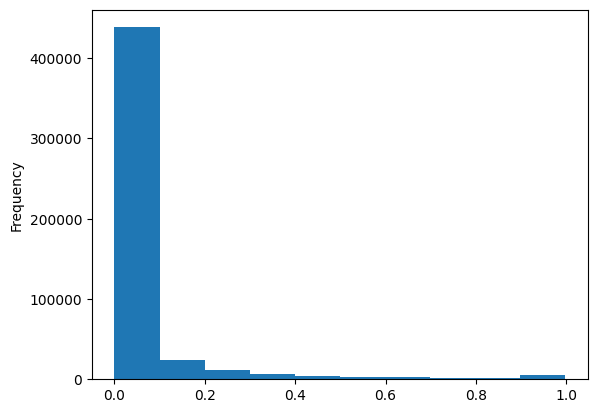

In [89]:
test['probability'].plot(kind='hist')

<Axes: ylabel='Frequency'>

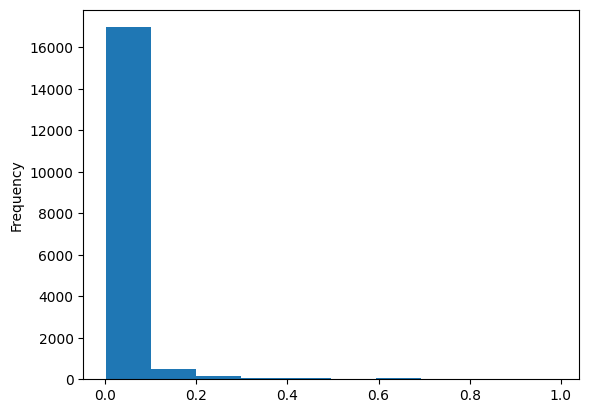

In [90]:
test[test['category_level_1_1'] == 'Животные']['probability'].plot(kind='hist')

In [91]:
test.loc[test['category_level_1_1'] == 'Животные', 'probability'] *= 1.3
test['probability'] = test['probability'].clip(0, 1)

<Axes: ylabel='Frequency'>

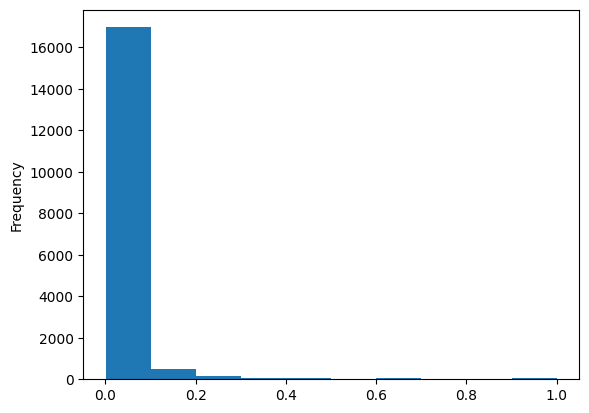

In [92]:
test[test['category_level_1_1'] == 'Животные']['probability'].plot(kind='hist')

<Axes: ylabel='Frequency'>

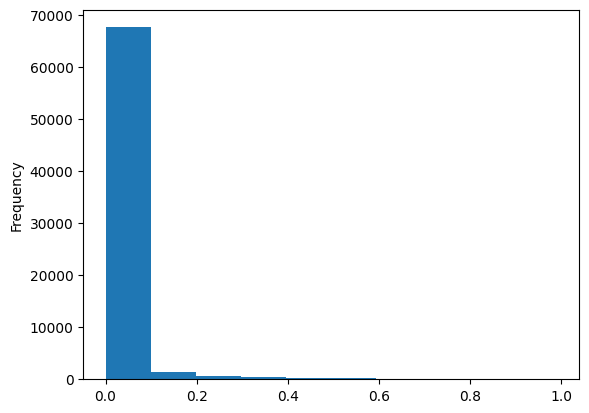

In [93]:
test[test['category_level_1_1'] == 'Электроника']['probability'].plot(kind='hist')

In [94]:
test.loc[test['category_level_1_1'] == 'Электроника', 'probability'] *= 1.3
test['probability'] = test['probability'].clip(0, 1)

<Axes: ylabel='Frequency'>

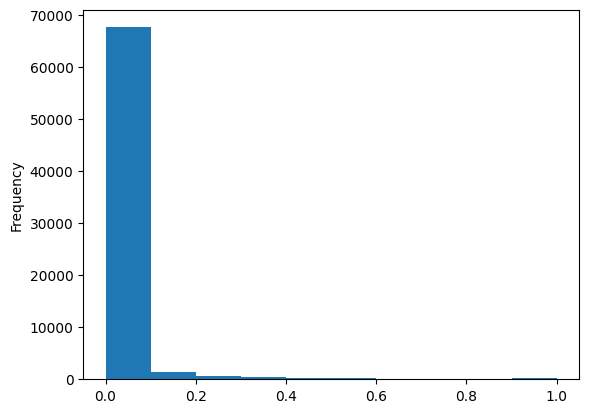

In [95]:
test[test['category_level_1_1'] == 'Электроника']['probability'].plot(kind='hist')

<Axes: ylabel='Frequency'>

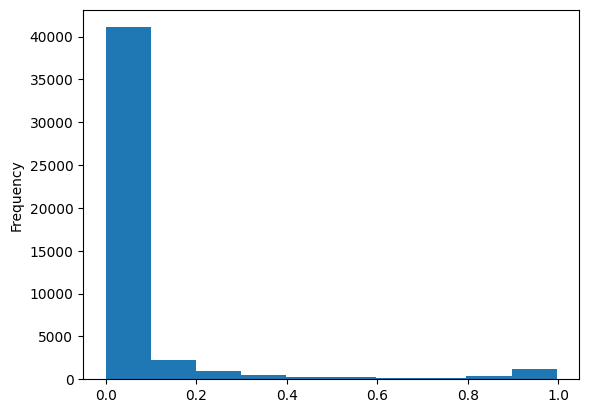

In [96]:
test[test['category_level_1_1'] == 'Транспорт']['probability'].plot(kind='hist')

In [97]:
test.loc[test['category_level_1_1'] == 'Транспорт', 'probability'] *= 1.2
test['probability'] = test['probability'].clip(0, 1)

<Axes: ylabel='Frequency'>

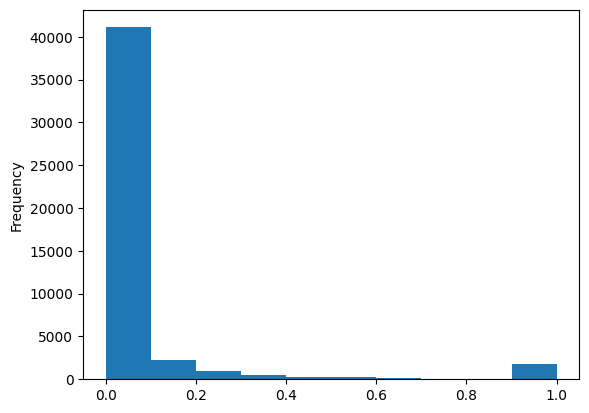

In [98]:
test[test['category_level_1_1'] == 'Транспорт']['probability'].plot(kind='hist')

In [99]:
test = test[['base_id', 'cand_id', 'probability']]

In [100]:
test.to_csv('z_e_1_3_t_1_25_0_5baselama_3seeds_0_5((0_3cat1lamas_0_7cat1cbs)_10f).csv', index=False)